In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key,consumer_secret,access_token ,access_token_secret


In [2]:
# Setup Tweepy API Authentication -2
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#Set targerted news outlets to a list 
news_outlets = ['BBC', 'CBS', 'CNN', 'fox', 'nytimes']

  

In [4]:
#Loop through all targeted news outlets
tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_outlets :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []
 
    
    public_tweets = api.user_timeline(target_outlet, count=tweet_count)

    
    i = 0
    for tweet in public_tweets:
      
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"]
        
        #Vader Sentiment Analysis
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_sentiment_analysis = news_sentiment_analysis.append(data)  

    news_sentiment_analysis.set_index('news_media', 'create_date')

#Save output csv
news_sentiment_analysis.to_csv("news_media_sentiment_analysis.csv")

In [5]:

#save the data return into a pandas dataframe for analysis as well as a csv output file
data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
news_sentiment_analysis = news_sentiment_analysis.append(data)  


news_sentiment_analysis.set_index('news_media', 'create_date')
news_sentiment_analysis.to_csv("news_media_sentiment_analysis.csv")

In [6]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99   0  -1  -2  -3  -4  -5  -6  -7
  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25
 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35 -36 -37 -38 -39 -40 -41 -42 -43
 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53 -54 -55 -56 -57 -58 -59 -60 -61
 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71 -72 -73 -74 -75 -76 -77 -78 -79
 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89 -90 -91 -92 -93 -94 -95 -96 -97
 -98 -99]


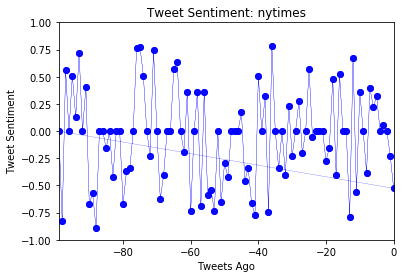

In [7]:
# Plot Time Between tweets for nytimes 
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'nytimes')
plt.savefig("nytimes.png")
plt.show()

In [8]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']


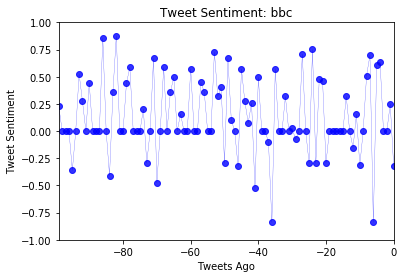

In [9]:
# Plot Time Between tweets for bbc 
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'bbc')
plt.savefig("bbc.png")
plt.show()

In [10]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']


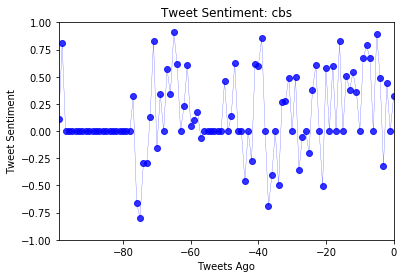

In [11]:
# Plot Time Between tweets for CBS 
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'cbs')
plt.savefig("cbs.png")
plt.show()

In [12]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']


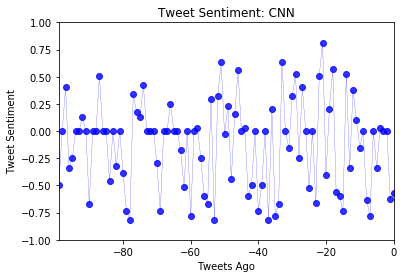

In [13]:
# Plot Time Between tweets for bbc 
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])
#plt.ylim(np.min(tweet_compound),np.max(tweet_compound)) 

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'CNN')
plt.savefig("CNN.png")
plt.show()

In [14]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']


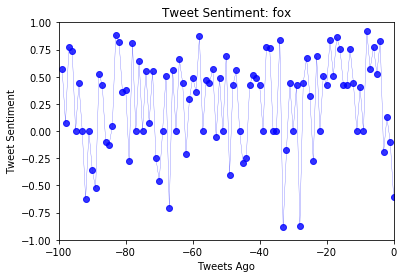

In [15]:
# Plot Time Between tweets for Fox 
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="b")

plt.xlim(-100,0) 
plt.ylim([-1,1])


plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'fox')
plt.savefig("fox.png")
plt.show()
plt.show()

In [16]:
#PLot overall sentimental analysis of all media outlets
overall_sent = []
for target_outlet in news_outlets:
    print(target_outlet)
    tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media==target_outlet]['compound']
    overall_sent.append(np.mean(tweet_compound))

print(overall_sent)


BBC
CBS
CNN
fox
nytimes
[0.125957, 0.139859, -0.11868600000000001, 0.26059599999999994, -0.052537]


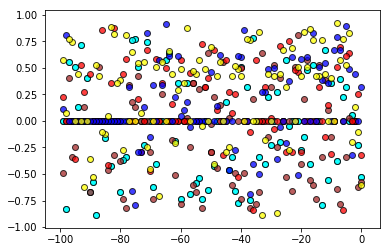

In [17]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
nytimes=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="cyan", edgecolors="black",
            alpha=0.75)

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
cnn=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']
plt.scatter(tweets_ago, cnn, marker="o", facecolors="brown", edgecolors="black",
            alpha=0.75)


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
bbc=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
plt.scatter(tweets_ago, bbc, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
cbs=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']
plt.scatter(tweets_ago, cbs, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)


tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
fox=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
plt.scatter(tweets_ago, fox, marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)
#save output image as png
plt.savefig("sentimental_all.png")

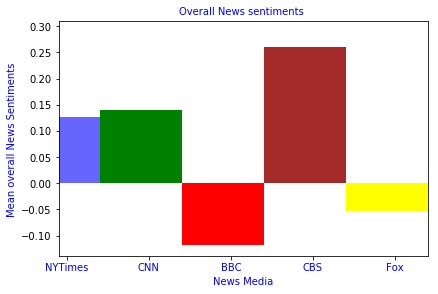

In [18]:
#Plot the bar graph of sentimental analysis of all targeted media outlets
x_axis = [0,1,2,3,4]

plt.bar(0, overall_sent[0], facecolor='blue', alpha=0.6, align="center",width=1.0)
plt.bar(1, overall_sent[1], facecolor='green', alpha=1.0, align="center",width=1.0)
plt.bar(2, overall_sent[2], facecolor='red', alpha=1.0, align="center",width=1.0)
plt.bar(3, overall_sent[3], facecolor='brown', alpha=1.0, align="center",width=1.0)
plt.bar(4, overall_sent[4], facecolor='yellow', alpha=1.0, align="center",width=1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["NYTimes","CNN","BBC", "CBS", "Fox"], fontsize=10, color='blue')

plt.xlim(0, 4.5)
plt.ylim(min(overall_sent)-0.02, max(overall_sent)+0.05)

plt.title("Overall News sentiments ", fontsize=10, color='blue')
plt.xlabel("News Media", fontsize=10, color='blue')
plt.ylabel("Mean overall News Sentiments ", fontsize=10, color='blue')
plt.tight_layout(pad=0.4, w_pad=0.01, h_pad=1.0)
plt.savefig("all_sentiments_bar.png")
plt.show()